In [65]:
import pandas as pd
import numpy as np
from dotenv import dotenv_values, find_dotenv
import matplotlib.pyplot as plt
import os
config = dotenv_values(find_dotenv())
path_cleandata = os.path.abspath(config["CLEANDATA"]) + '\\'
path_figures = os.path.abspath(config["FIGURES"]) + '\\'

In [44]:
# import my merged data
data = pd.read_pickle(path_cleandata + 'BEA6_IOsupply_merged.pkl')


In [77]:
data.head()

,product_I,product_O,IO_value,date,quantityindex_I,priceindex_I,expenditures_I,quantityindex_O,priceindex_O,expenditures_O
0,All other professional...,All other professional...,253018.0,1959-01-31,NaN,NaN,NaN,NaN,NaN,NaN
1,All other professional...,All other professional...,253018.0,1959-04-30,NaN,NaN,NaN,NaN,NaN,NaN
2,All other professional...,All other professional...,253018.0,1959-07-31,NaN,NaN,NaN,NaN,NaN,NaN
3,All other professional...,All other professional...,253018.0,1959-10-31,NaN,NaN,NaN,NaN,NaN,NaN
4,All other professional...,All other professional...,253018.0,1960-01-31,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# filter for the year 2017 
data2017 = data[data['date'].dt.year == 2017]

In [46]:
# two separate plots for input vs output products?
# so if the expenditures really do line up with the I-O table values then i believe it wont matter? 
# ask nick about this

data_I = data2017[['product_I', 'IO_value', 'expenditures_I']]

data_O = data2017[['product_O', 'IO_value', 'expenditures_O']]

In [76]:
data_I.head(16)

,product_I,IO_value,expenditures_I
232,All other professional...,253018.0,62631.0
233,All other professional...,253018.0,62704.0
234,All other professional...,253018.0,64265.0
235,All other professional...,253018.0,65363.0
491,All other professional...,NaN,62631.0
492,All other professional...,NaN,62704.0
493,All other professional...,NaN,64265.0
494,All other professional...,NaN,65363.0
750,All other professional...,NaN,62631.0
751,All other professional...,NaN,62704.0


In [48]:
data_O.head(16)

,product_O,IO_value,expenditures_O
232,All other professional...,253018.0,62631.0
233,All other professional...,253018.0,62704.0
234,All other professional...,253018.0,64265.0
235,All other professional...,253018.0,65363.0
491,"Audio discs, tapes, vi...",NaN,3487.0
492,"Audio discs, tapes, vi...",NaN,3685.0
493,"Audio discs, tapes, vi...",NaN,3512.0
494,"Audio discs, tapes, vi...",NaN,3149.0
750,Auto leasing,NaN,35305.0
751,Auto leasing,NaN,35321.0


In [70]:
# sum by product for that year

# here i think it would be best to take the average of the I-O value (since it's just the same thing for each by-product observation)
# then i would take the sum of expenditures_I or expenditures_O

byproduct_I = data_I.groupby('product_I').agg({
    'IO_value': 'mean',
    'expenditures_I': 'sum'}, min_count=1)

byproduct_O = data_O.groupby('product_O').agg({
    'IO_value': 'mean',
    'expenditures_O': 'sum'}, min_count=1)

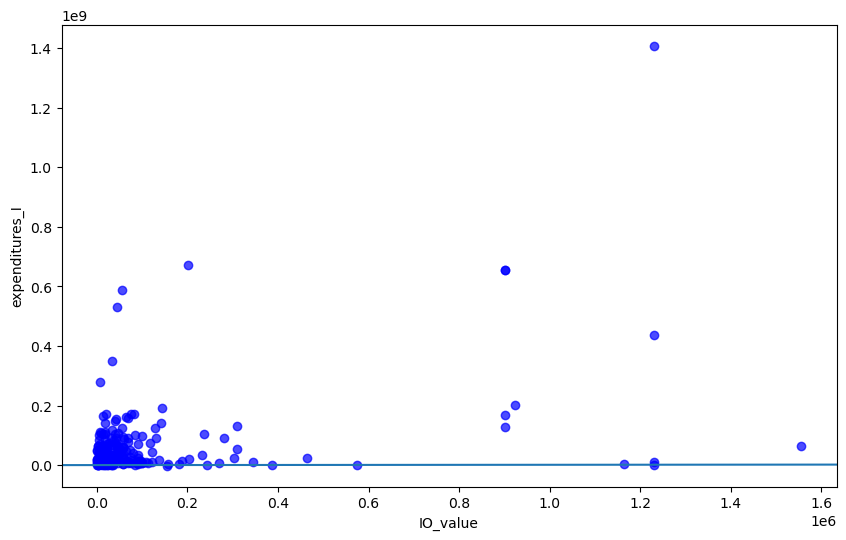

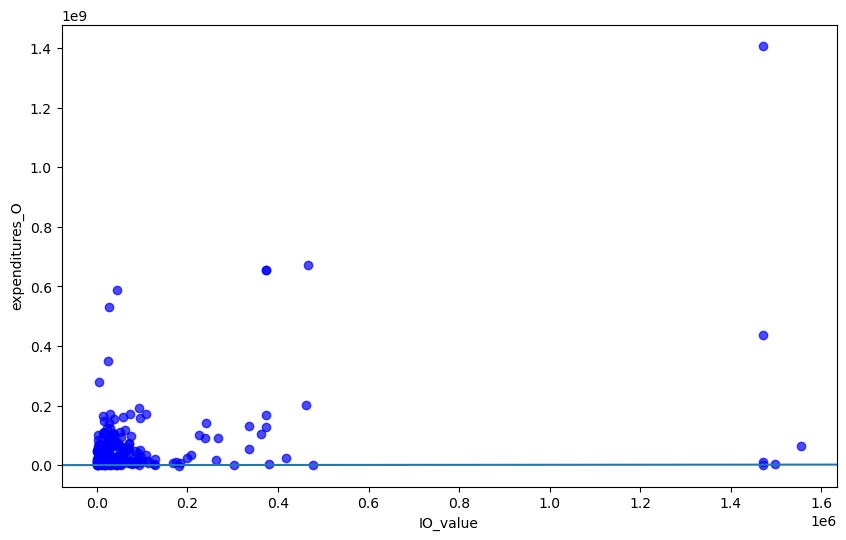

In [72]:
# do the scatter plot with expenditures on the x axis

plt.figure(figsize=(10, 6))
plt.scatter( byproduct_I['IO_value'], byproduct_I['expenditures_I'], c='blue', alpha=0.7)

plt.xlabel('IO_value')
plt.ylabel('expenditures_I')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\expenditures_I.pdf')

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter( byproduct_O['IO_value'], byproduct_O['expenditures_O'], c='blue', alpha=0.7)

plt.xlabel('IO_value')
plt.ylabel('expenditures_O')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\expenditures_O.pdf')

c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\EmilyFu\.conda\envs\myenv\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


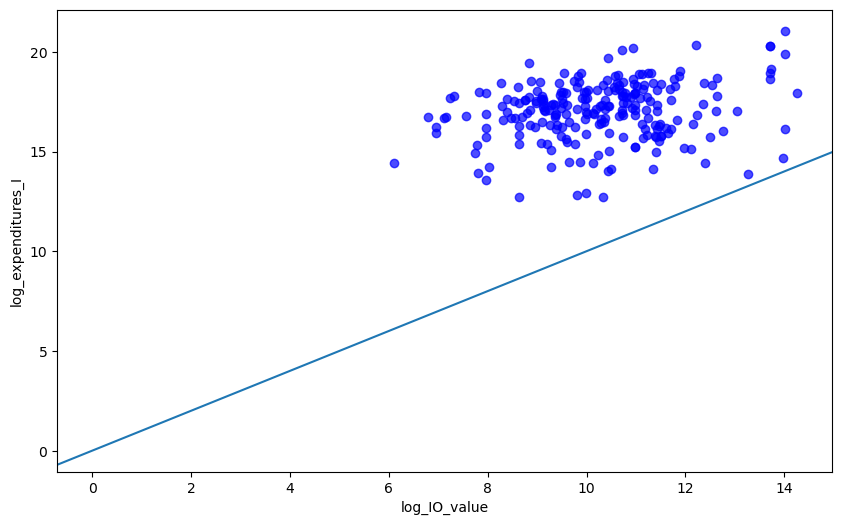

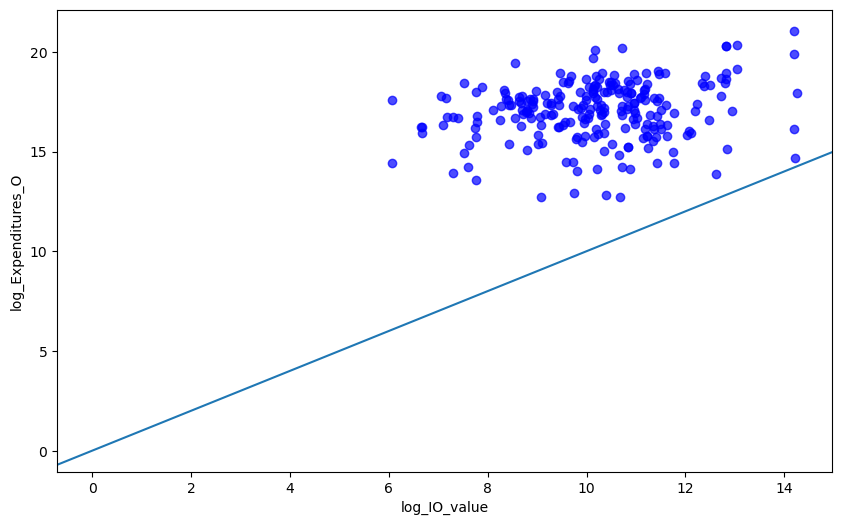

In [74]:
# get logs of everything and do an equivalent scatter plot with those

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct_I['IO_value']), np.log(byproduct_I['expenditures_I']), c='blue', alpha=0.7)

plt.xlabel('log_IO_value')
plt.ylabel('log_expenditures_I')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures_I.pdf')

# do the scatter plot with expenditures on the x axis
plt.figure(figsize=(10, 6))
plt.scatter(np.log(byproduct_O['IO_value']), np.log(byproduct_O['expenditures_O']), c='blue', alpha=0.7)

plt.xlabel('log_IO_value')
plt.ylabel('log_Expenditures_O')

ax = plt.gca()
ax.axline((0, 0), slope=1)

plt.savefig(path_figures + 'merge_check\\log_expenditures_O.pdf')